In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
import seaborn as sns

###CHANGE META INFORMATION###
#03-08
month = "04"
#A or B
direction = "A"
#packets or bytes
evaluating = "bytes"
#4, 6 or 0 for both ip versions combined
ipversion = "4"
#############################

df = pd.read_table(f'../data/applications_silk_{month}_{direction}.csv', sep='|')
df = df.sort_values(by=[evaluating],ascending=False)
df = df.replace({'unidentified':'unclassified'})

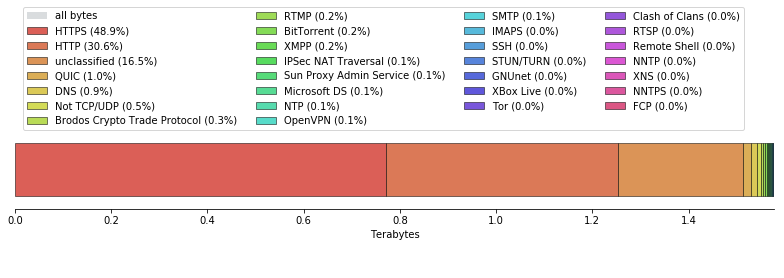

In [2]:
#dataframes
df_packets=df.groupby('application name')[['packets']].sum()
df_packets=df_packets.sort_values(by=['packets'],ascending=False)
df_bytes=df.groupby('application name')[['bytes']].sum()
df_bytes=df_bytes.sort_values(by=['bytes'],ascending=False)
df4=df[df['ip version'] == 4]
df6=df[df['ip version'] == 6]

#values (packets/bytes)
packets = df_packets['packets'].tolist()
packets4 = df4['packets'].tolist()
packets6 = df6['packets'].tolist()

bytes = df_bytes['bytes'].tolist()
bytes4 = df4['bytes'].tolist()
bytes6 = df6['bytes'].tolist()
for index, element in enumerate(bytes4):
    bytes4[index] /= (1024*1024*1024*1024)
for index, element in enumerate(bytes6):
    bytes6[index] /= (1024*1024*1024)

#app names
names = df_packets.index.values
names4 = df4['application name'].tolist()
names6 = df6['application name'].tolist()

if ipversion == "4":
    n = names4
    if evaluating == "bytes":
        e = bytes4
        s = "Terabytes"
    else:
        e = packets4
        s = "Packets"
elif ipversion == "6":
    n = names6
    if evaluating == "bytes":
        e = bytes6
        s = "Gigabytes"
    else:
        e = packets6
        s = "Packets"
else:
    n = names
    if evaluating == "bytes":
        e = bytes
        s = "Terabytes"
    else:
        e = packets
        s = "Packets"

sns.set_palette(sns.color_palette("hls",len(e)+1))
                
plt.rcParams["figure.figsize"] = [11, 3.5]
fig, chart_ax = plt.subplots()
plt.rcdefaults()
outer_bar_length = 0
outer_bar_label = 'all bytes'
y_pos = [0]
width = 0.3
chart_ax.barh(y_pos, 0, 1.0, align='center', color='white', ecolor='black', label=None)
if outer_bar_length != -1:
 chart_ax.barh(y_pos, outer_bar_length, 0.12,
 align='center', color='#D9DCDE', label=outer_bar_label, left=0)

left_pos = 0

#change values here
for idx, val in enumerate(e):
    outer_bar_length+=val
for idx, val in enumerate(e):
    label=n[idx]+" ({:.1%})".format(val/float(outer_bar_length))
    chart_ax.barh(y_pos, [val], width, align='center', label=label, left=left_pos, edgecolor=['black', 'black'], linewidth=0.5)
    left_pos += val

chart_ax.set_yticks([1])
chart_ax.invert_yaxis()
chart_ax.set_xlabel(s)
plt.tight_layout()
    
#legend
anchor_vals = (0.01, 0.7, 0.95, 0.2)
plt.legend(bbox_to_anchor=anchor_vals, loc=4, ncol=4, mode="expand", borderaxespad=0.0)
ax = plt.gca()
chart_ax.spines['top'].set_visible(False)
chart_ax.spines['left'].set_visible(False)
chart_ax.spines['right'].set_visible(False)
chart_ax.spines['bottom'].set_position(('axes', 0.3))
plt.show()